In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)



In [3]:
# Styling
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("="*70)
print(" SPOTIFY USER BEHAVIOUR - INITIAL EXPLORATION")
print("="*70)

 SPOTIFY USER BEHAVIOUR - INITIAL EXPLORATION


In [4]:
# 1. LOAD DATA
print("STEP 1: Loading Data...")

df = pd.read_csv('../data/raw/Spotify_data.csv')

print(f"✓ Data loaded successfully")
print(f"  → Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"  → Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

STEP 1: Loading Data...


FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/Spotify_data.csv'

In [5]:
print("STEP 1: Loading Data...")

df = pd.read_csv('data/raw/Spotify_data.csv')

print(f"✓ Data loaded successfully")
print(f"  → Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"  → Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

STEP 1: Loading Data...


FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/Spotify_data.csv'

In [6]:
print("STEP 1: Loading Data...")

df = pd.read_excel("data/raw/Spotify_data.xlsx")

print(f"✓ Data loaded successfully")
print(f"  → Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"  → Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

STEP 1: Loading Data...
✓ Data loaded successfully
  → Shape: 520 rows × 20 columns
  → Memory: 0.57 MB


In [7]:
# 2. FIRST LOOK
print("\n" + "="*70)
print("STEP 2: First Look at Data")
print("="*70)

print("\nFirst 5 rows:")
print(df.head())

print("\nColumn Names:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

print("\nData Types:")
print(df.dtypes)


STEP 2: First Look at Data

First 5 rows:
     Age  Gender spotify_usage_period  \
0  20-35  Female    More than 2 years   
1  12-20    Male    More than 2 years   
2  35-60  Others   6 months to 1 year   
3  20-35  Female    1 year to 2 years   
4  20-35  Female    1 year to 2 years   

                         spotify_listening_device spotify_subscription_plan  \
0              Smart speakers or voice assistants       Free (ad-supported)   
1                              Computer or laptop       Free (ad-supported)   
2              Smart speakers or voice assistants       Free (ad-supported)   
3  Smartphone, Smart speakers or voice assistants       Free (ad-supported)   
4                                      Smartphone       Free (ad-supported)   

  premium_sub_willingness          preffered_premium_plan  \
0                     Yes        Family Plan-Rs 179/month   
1                     Yes  Individual Plan- Rs 119/ month   
2                     Yes        Student Plan-Rs 59/

In [8]:
# 3. DATA QUALITY CHECK
print("\n" + "="*70)
print("STEP 3: Data Quality Assessment")
print("="*70)


STEP 3: Data Quality Assessment


In [9]:
# Missing values
print("\nMissing Values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct.round(2)
}).sort_values('Percentage', ascending=False)

if missing_df['Missing_Count'].sum() == 0:
    print("  ✓ No missing values found!")
else:
    print(missing_df[missing_df['Missing_Count'] > 0])

# Duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")
if duplicates == 0:
    print("  ✓ No duplicates found!")

# Unique values
print("\nUnique Values per Column:")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"  {col:35s}: {unique_count:4d} unique values")


Missing Values:
                        Missing_Count  Percentage
preffered_premium_plan            208       40.00
fav_pod_genre                     148       28.46
pod_host_preference               141       27.12
preffered_pod_format              140       26.92
preffered_pod_duration            129       24.81

Duplicate Rows: 1

Unique Values per Column:
  Age                                :    5 unique values
  Gender                             :    3 unique values
  spotify_usage_period               :    4 unique values
  spotify_listening_device           :   15 unique values
  spotify_subscription_plan          :    2 unique values
  premium_sub_willingness            :    2 unique values
  preffered_premium_plan             :    4 unique values
  preferred_listening_content        :    2 unique values
  fav_music_genre                    :   11 unique values
  music_time_slot                    :    3 unique values
  music_Influencial_mood             :   15 unique values


STEP 4: Target Variable Analysis

Target Variable: premium_sub_willingness

Distribution:
premium_sub_willingness
No     334
Yes    186
Name: count, dtype: int64

Percentages:
premium_sub_willingness
No     64.23
Yes    35.77
Name: proportion, dtype: float64


FileNotFoundError: [Errno 2] No such file or directory: '../outputs/visualizations/target_distribution.png'

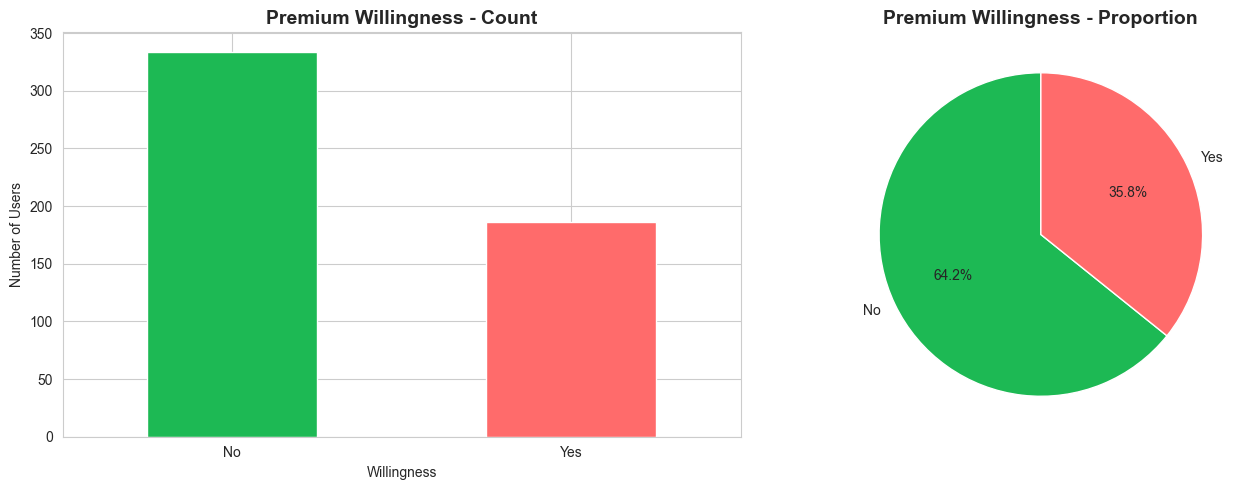

In [10]:
# 4. TARGET VARIABLE ANALYSIS
print("\n" + "="*70)
print("STEP 4: Target Variable Analysis")
print("="*70)

# Check if target column exists (might have different name)
target_col = 'premium_sub_willingness'
if target_col in df.columns:
    print(f"\nTarget Variable: {target_col}")
    print("\nDistribution:")
    print(df[target_col].value_counts())
    print("\nPercentages:")
    print(df[target_col].value_counts(normalize=True).mul(100).round(2))
    
    # Visualize
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    
    # Count plot
    df[target_col].value_counts().plot(kind='bar', ax=ax[0], color=['#1DB954', '#FF6B6B'])
    ax[0].set_title('Premium Willingness - Count', fontsize=14, fontweight='bold')
    ax[0].set_xlabel('Willingness')
    ax[0].set_ylabel('Number of Users')
    ax[0].tick_params(axis='x', rotation=0)
    
    # Pie chart
    df[target_col].value_counts().plot(kind='pie', ax=ax[1], autopct='%1.1f%%', 
                                        colors=['#1DB954', '#FF6B6B'], startangle=90)
    ax[1].set_title('Premium Willingness - Proportion', fontsize=14, fontweight='bold')
    ax[1].set_ylabel('')
    
    plt.tight_layout()
    plt.savefig('../outputs/visualizations/target_distribution.png', dpi=300, bbox_inches='tight')
    print("\n✓ Visualization saved: target_distribution.png")
else:
    print(f"⚠ Column '{target_col}' not found. Please check column names.")


STEP 4: Target Variable Analysis

Target Variable: premium_sub_willingness

Distribution:
premium_sub_willingness
No     334
Yes    186
Name: count, dtype: int64

Percentages:
premium_sub_willingness
No     64.23
Yes    35.77
Name: proportion, dtype: float64

✓ Visualization saved: target_distribution.png


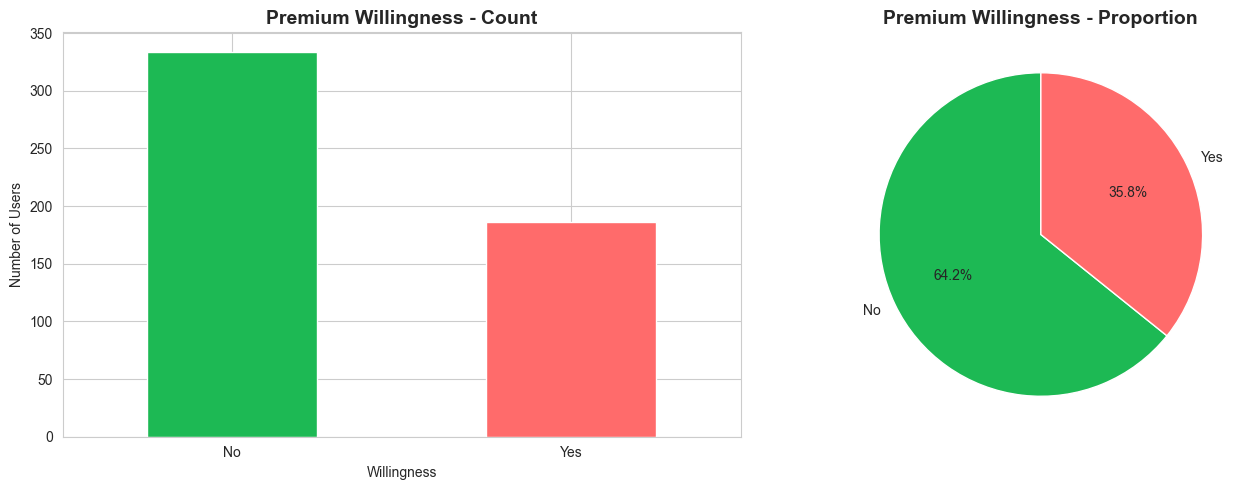

In [11]:
# 4. TARGET VARIABLE ANALYSIS
print("\n" + "="*70)
print("STEP 4: Target Variable Analysis")
print("="*70)

# Check if target column exists (might have different name)
target_col = 'premium_sub_willingness'
if target_col in df.columns:
    print(f"\nTarget Variable: {target_col}")
    print("\nDistribution:")
    print(df[target_col].value_counts())
    print("\nPercentages:")
    print(df[target_col].value_counts(normalize=True).mul(100).round(2))
    
    # Visualize
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    
    # Count plot
    df[target_col].value_counts().plot(kind='bar', ax=ax[0], color=['#1DB954', '#FF6B6B'])
    ax[0].set_title('Premium Willingness - Count', fontsize=14, fontweight='bold')
    ax[0].set_xlabel('Willingness')
    ax[0].set_ylabel('Number of Users')
    ax[0].tick_params(axis='x', rotation=0)
    
    # Pie chart
    df[target_col].value_counts().plot(kind='pie', ax=ax[1], autopct='%1.1f%%', 
                                        colors=['#1DB954', '#FF6B6B'], startangle=90)
    ax[1].set_title('Premium Willingness - Proportion', fontsize=14, fontweight='bold')
    ax[1].set_ylabel('')
    
    plt.tight_layout()
    plt.savefig('outputs/visualizations/target_distribution.png', dpi=300, bbox_inches='tight')
    print("\n✓ Visualization saved: target_distribution.png")
else:
    print(f"⚠ Column '{target_col}' not found. Please check column names.")

In [12]:
# 5. CURRENT SUBSCRIPTION STATUS
print("\n" + "="*70)
print("STEP 5: Current Subscription Analysis")
print("="*70)

plan_col = 'spotify_subscription_plan'
if plan_col in df.columns:
    print("\nCurrent Plan Distribution:")
    print(df[plan_col].value_counts())
    print("\nPercentages:")
    print(df[plan_col].value_counts(normalize=True).mul(100).round(2))


# 6. DEMOGRAPHIC OVERVIEW

print("\n" + "="*70)
print("STEP 6: Demographics Overview")
print("="*70)

# Age
if 'Age' in df.columns:
    print("\nAge Distribution:")
    print(df['Age'].value_counts().sort_index())

# Gender
if 'Gender' in df.columns:
    print("\nGender Distribution:")
    print(df['Gender'].value_counts())

# Usage period
if 'spotify_usage_period' in df.columns:
    print("\nUsage Period Distribution:")
    print(df['spotify_usage_period'].value_counts())


# 7. QUICK INSIGHTS

print("\n" + "="*70)
print("STEP 7: Quick Preliminary Insights")
print("="*70)

if target_col in df.columns and plan_col in df.columns:
    # Premium willingness by current plan
    cross_tab = pd.crosstab(df[plan_col], df[target_col], normalize='index') * 100
    print("\nPremium Willingness by Current Plan (%):")
    print(cross_tab.round(2))

# Music listening frequency
if 'music_lis_frequency' in df.columns:
    print("\nMusic Listening Frequency:")
    print(df['music_lis_frequency'].value_counts())

# Podcast frequency
if 'pod_lis_frequency' in df.columns:
    print("\nPodcast Listening Frequency:")
    print(df['pod_lis_frequency'].value_counts())


# 8. SUMMARY

print("\n" + "="*70)
print("EXPLORATION COMPLETE - KEY TAKEAWAYS")
print("="*70)

print(f"""
Dataset Summary:
  • Total Users: {len(df):,}
  • Total Features: {len(df.columns)}
  • Missing Values: {missing_df['Missing_Count'].sum()}
  • Duplicate Rows: {duplicates}
  
Data Quality: {'✓ GOOD' if missing_df['Missing_Count'].sum() == 0 and duplicates == 0 else '⚠ NEEDS CLEANING'}

Next Steps:
  1. Clean any data quality issues
  2. Create derived features
  3. Perform detailed analysis
  4. Build visualizations
""")

print("="*70)


STEP 5: Current Subscription Analysis

Current Plan Distribution:
spotify_subscription_plan
Free (ad-supported)            424
Premium (paid subscription)     96
Name: count, dtype: int64

Percentages:
spotify_subscription_plan
Free (ad-supported)            81.54
Premium (paid subscription)    18.46
Name: proportion, dtype: float64

STEP 6: Demographics Overview

Age Distribution:
Age
12-20     71
20-35    422
35-60     23
6-12       3
60+        1
Name: count, dtype: int64

Gender Distribution:
Gender
Female    391
Male      114
Others     15
Name: count, dtype: int64

Usage Period Distribution:
spotify_usage_period
More than 2 years     169
1 year to 2 years     141
6 months to 1 year    119
Less than 6 months     91
Name: count, dtype: int64

STEP 7: Quick Preliminary Insights

Premium Willingness by Current Plan (%):
premium_sub_willingness         No    Yes
spotify_subscription_plan                
Free (ad-supported)          73.11  26.89
Premium (paid subscription)  25.00  75.